In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [2]:
import numpy
import functools
import operator
import imageio
import matplotlib.pyplot
from skimage.metrics import structural_similarity as ssim

!pip install pygad
import pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 4.6 MB/s eta 0:00:00



<br>
<b>Image Regenerating using Genetic Algorithm</b> is a Python project that uses the PyGAD library for reproducing images using the genetic algorithm. We reproduce a single image using Genetic Algorithm (GA) by evolving pixel values.<br><br>
For implementing the genetic algorithm, the PyGAD library is used. Check its documentation here: https://pygad.readthedocs.io <br><br>
This project works with both color and gray images without any modifications.<br><br>
This project is implemented using Python 3.5 by Tharun V S (210420104171) and Surender V (210420104164) Dept. of CSE, CIT.<br><br>
<b>Contact info</b>:<br>
tharunvs.cse2020@citchennai.net<br>
surenderv.cse2020@cithchennai.net<br>





In [3]:
def img2chromosome(img_arr):
    """
    Represents the image as a 1D vector.    
    Returns the vector.
    """

    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    """
    Converts a 1D vector into an array.
    
    vector: The vector to be converted into an array.
    shape: The shape of the target array.
    
    Returns the array.
    """

    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

Reading target image to be reproduced using Genetic Algorithm (GA).

In [4]:
target_im = imageio.imread('/content/drive/MyDrive/Project/MP_Input/cherry.png')

# target_im = imageio.imread('/content/drive/MyDrive/Project/MP_Input/cherrybw.png')
# target_im = imageio.imread('/content/drive/MyDrive/Project/MP_Input/hqcherry.png')
# target_im = imageio.imread('/content/drive/MyDrive/Project/MP_Input/hqcherrybw.png')

target_im = numpy.asarray(target_im/255, dtype=numpy.float)

<ipython-input-4-96b0f2e2dc17>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_im = imageio.imread('/content/drive/MyDrive/Project/MP_Input/cherry.png')
<ipython-input-4-96b0f2e2dc17>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target_im = numpy.asarray(target_im/255, dtype=numpy.float)


Target image after enconding. Value encoding is used.

In [5]:
target_chromosome = img2chromosome(target_im)

In [6]:
def fitness_fun(solution, solution_idx):
    """
    Calculating the fitness value for a solution in the population.
    The fitness value is calculated using the sum of absolute difference between genes values in the original and reproduced chromosomes.
    
    solution: Current solution in the population to calculate its fitness.
    solution_idx: Index of the solution within the population.
    """
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

In [7]:
def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    if ga_instance.generations_completed % 5000 == 0:
        matplotlib.pyplot.imsave('solution_'+str(ga_instance.generations_completed)+'.png', chromosome2img(ga_instance.best_solution()[0], target_im.shape))

In [8]:
ga_instance = pygad.GA(num_generations=50000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0,
                       callback_generation=callback)

TypeError: ignored

In [ ]:
ga_instance.run()

Streaming output truncated to the last 5000 lines.
Generation = 46380
Fitness    = 21210.724180029145
Generation = 46381
Fitness    = 21210.724180029145
Generation = 46382
Fitness    = 21210.724180029145
Generation = 46383
Fitness    = 21210.724180029145
Generation = 46384
Fitness    = 21210.87202498508
Generation = 46385
Fitness    = 21210.87202498508
Generation = 46386
Fitness    = 21210.87202498508
Generation = 46387
Fitness    = 21210.87202498508
Generation = 46388
Fitness    = 21210.87202498508
Generation = 46389
Fitness    = 21210.87202498508
Generation = 46390
Fitness    = 21210.87202498508
Generation = 46391
Fitness    = 21210.87202498508
Generation = 46392
Fitness    = 21210.87202498508
Generation = 46393
Fitness    = 21210.87202498508
Generation = 46394
Fitness    = 21210.87202498508
Generation = 46395
Fitness    = 21210.87202498508
Generation = 46396
Fitness    = 21210.87202498508
Generation = 46397
Fitness    = 21210.87202498508
Generation = 46398
Fitness    = 21210.8720249

After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


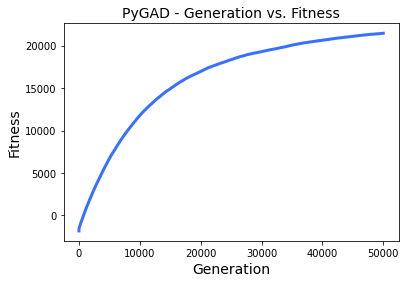

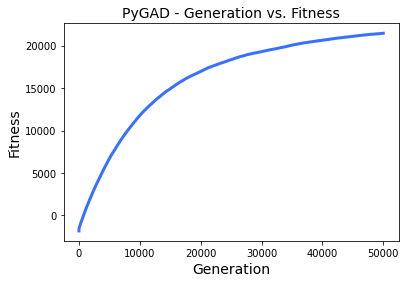

In [ ]:
ga_instance.plot_result()

Returning the details of the best solution.

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Fitness value of the best solution = 21459.095435243224
Index of the best solution : 0


In [ ]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Best fitness value reached after 49977 generations.


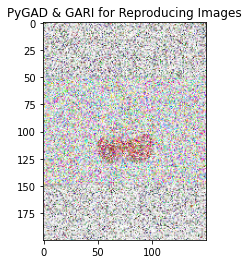

In [ ]:
result = chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()

In [ ]:
tenk_im = imageio.imread('solution_10000.png')
#tenk_im = tenk_im[:, :, :3]
tenk_im = numpy.asarray(tenk_im/255, dtype=numpy.float)

twentyk_im = imageio.imread('solution_20000.png')
# twentyk_im = twentyk_im[:, :, :3]
twentyk_im = numpy.asarray(twentyk_im/255, dtype=numpy.float)

thirtyk_im = imageio.imread('solution_30000.png')
# thirtyk_im = thirtyk_im[:, :, :3]
thirtyk_im = numpy.asarray(thirtyk_im/255, dtype=numpy.float)

fortyk_im = imageio.imread('solution_40000.png')
# fortyk_im = fortyk_im[:, :, :3]
fortyk_im = numpy.asarray(fortyk_im/255, dtype=numpy.float)

fiftyk_im = imageio.imread('solution_50000.png')
# fiftyk_im = fiftyk_im[:, :, :3]
fiftyk_im = numpy.asarray(fiftyk_im/255, dtype=numpy.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist

In [ ]:
ssim_best = ssim(target_im, result,
                  data_range=result.max() - result.min(), multichannel=True)
ssim_tenk = ssim(target_im, tenk_im,
                  data_range=tenk_im.max() - tenk_im.min(), multichannel=True)
ssim_twentyk = ssim(target_im, twentyk_im,
                  data_range=twentyk_im.max() - twentyk_im.min(), multichannel=True)
ssim_thirtyk = ssim(target_im, thirtyk_im,
                  data_range=thirtyk_im.max() - thirtyk_im.min(), multichannel=True)
ssim_fortyk = ssim(target_im, fortyk_im,
                  data_range=fortyk_im.max() - fortyk_im.min(), multichannel=True)
ssim_fiftyk = ssim(target_im, fiftyk_im,
                  data_range=fiftyk_im.max() - fiftyk_im.min(), multichannel=True)



In [ ]:
print("SSIM Measure for Best Generation: ", ssim_best)

print("SSIM Measure for 10000 Generation: ", ssim_tenk)

print("SSIM Measure for 20000 Generation: ", ssim_twentyk)

print("SSIM Measure for 30000 Generation: ", ssim_thirtyk)

print("SSIM Measure for 40000 Generation: ", ssim_fortyk)

print("SSIM Measure for 50000 Generation: ", ssim_fiftyk)

SSIM Measure for Best Generation:  0.0488154773957484
SSIM Measure for 10000 Generation:  0.022485478941642146
SSIM Measure for 20000 Generation:  0.03329075621783201
SSIM Measure for 30000 Generation:  0.040122069215552815
SSIM Measure for 40000 Generation:  0.04512971396328799
SSIM Measure for 50000 Generation:  0.0487705422643877
